In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense,Embedding

Creating Training Data

In [ ]:
data =np.array(list(range(10))).astype(float)
data

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
window_size=3  # number of training data

In [ ]:
trainingdata=[np.array(data[i:i+window_size]).reshape(1,-1) for i in range(data.shape[0]-window_size)]
trainingdata=np.concatenate(trainingdata*10,axis=0)
trainingdata=trainingdata.reshape(trainingdata.shape[0],trainingdata.shape[1],1)



In [ ]:
trainingdata.shape

(70, 3, 1)

In [ ]:
trainingdata[:3]

array([[[0.],
        [1.],
        [2.]],

       [[1.],
        [2.],
        [3.]],

       [[2.],
        [3.],
        [4.]]])

In [ ]:
traininglabels=[data[i+window_size]for i in range(data.shape[0]-window_size)]
traininglabels=np.concatenate([traininglabels]*10,axis=0).reshape(-1,1)
traininglabels[0:5]

array([[3.],
       [4.],
       [5.],
       [6.],
       [7.]])

In [ ]:
from keras.src.callbacks import EarlyStopping
from keras.src.optimizers.legacy.adam import Adam
#intialiase mode
model=Sequential()
#rnn layer
model.add(SimpleRNN(1,activation='linear'))

#compile model
model.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=1),
              metrics=['mse'],

              )
callback=EarlyStopping(monitor='loss',patience=25)
#train model
model.fit(trainingdata,traininglabels,epochs=200,verbose=1,callbacks=callback)

Epoch 1/200
3/3 [==============================] - 1s 4ms/step - loss: 75.0521 - mse: 75.0521
Epoch 2/200
3/3 [==============================] - 0s 4ms/step - loss: 33.2309 - mse: 33.2309
Epoch 3/200
3/3 [==============================] - 0s 4ms/step - loss: 35.5118 - mse: 35.5118
Epoch 4/200
3/3 [==============================] - 0s 5ms/step - loss: 38.4540 - mse: 38.4540
Epoch 5/200
3/3 [==============================] - 0s 6ms/step - loss: 24.8712 - mse: 24.8712
Epoch 6/200
3/3 [==============================] - 0s 4ms/step - loss: 9.0603 - mse: 9.0603
Epoch 7/200
3/3 [==============================] - 0s 3ms/step - loss: 7.8263 - mse: 7.8263
Epoch 8/200
3/3 [==============================] - 0s 4ms/step - loss: 1.6500 - mse: 1.6500
Epoch 9/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0474 - mse: 0.0474
Epoch 10/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6582 - mse: 0.6582
Epoch 11/200
3/3 [==============================] - 0s 5ms/step - los

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#prediction from model / testing model
predicteddata=model.predict(trainingdata)

3/3 [==============================] - 0s 3ms/step


In [ ]:
predicteddata=predicteddata.flatten()
predicteddata

array([3.       , 4.       , 5.       , 5.9999995, 7.000001 , 7.9999995,
       9.       , 3.       , 4.       , 5.       , 5.9999995, 7.000001 ,
       7.9999995, 9.       , 3.       , 4.       , 5.       , 5.9999995,
       7.000001 , 7.9999995, 9.       , 3.       , 4.       , 5.       ,
       5.9999995, 7.000001 , 7.9999995, 9.       , 3.       , 4.       ,
       5.       , 5.9999995, 7.000001 , 7.9999995, 9.       , 3.       ,
       4.       , 5.       , 5.9999995, 7.000001 , 7.9999995, 9.       ,
       3.       , 4.       , 5.       , 5.9999995, 7.000001 , 7.9999995,
       9.       , 3.       , 4.       , 5.       , 5.9999995, 7.000001 ,
       7.9999995, 9.       , 3.       , 4.       , 5.       , 5.9999995,
       7.000001 , 7.9999995, 9.       , 3.       , 4.       , 5.       ,
       5.9999995, 7.000001 , 7.9999995, 9.       ], dtype=float32)

In [ ]:
for i in range(len(predicteddata[:8])):
  actualdata=trainingdata[i].flatten()
  predictedvalue = predicteddata[i]
  print(f'{actualdata} ==> {predictedvalue}')

[0. 1. 2.] ==> 3.0
[1. 2. 3.] ==> 4.0
[2. 3. 4.] ==> 5.0
[3. 4. 5.] ==> 5.999999523162842
[4. 5. 6.] ==> 7.000000953674316
[5. 6. 7.] ==> 7.999999523162842
[6. 7. 8.] ==> 9.0
[0. 1. 2.] ==> 3.0


Text(0, 0.5, 'actual data')

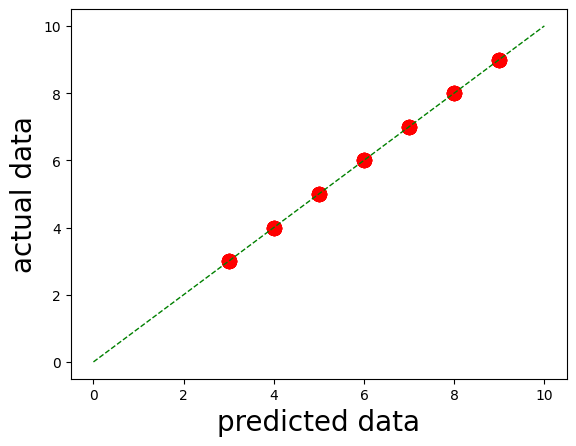

In [ ]:
import matplotlib.pyplot as plt
plt.plot([0,10],[0,10],color='g',ls='--',lw=1)
plt.scatter(predicteddata,traininglabels.flatten(),color='r',s=100)
plt.xlabel("predicted data",fontsize=20)
plt.ylabel("actual data",fontsize=20)

In [ ]:
testdata=np.array([[6,7,8],[9,10,11],[10,11,12],[25,26,27],[100,101,102],[1001,1002,1003]])
testpred=model.predict(testdata).flatten()

1/1 [==============================] - 0s 28ms/step


In [ ]:
testpred

array([   9.      ,   12.      ,   13.000001,   28.      ,  103.      ,
       1004.      ], dtype=float32)